<a href="https://colab.research.google.com/github/Mercymerine/DATA-ANALYSIS-AND-STORY-TELLIN/blob/main/Russian_drinks_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the data

Where should a drinks company run promotions?

📖 Background

Your company owns a chain of stores across Russia that sell a variety of alcoholic drinks. The company recently ran a wine promotion in Saint Petersburg that was very successful. Due to the cost to the business, it isn’t possible to run the promotion in all regions. The marketing team would like to target 10 other regions that have similar buying habits to Saint Petersburg where they would expect the promotion to be similarly successful.

The data

The marketing team has sourced you with historical sales volumes per capita for several different drinks types.





"year" - year (1998-2016)



"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast



"wine" - sale of wine in litres by year per capita



"beer" - sale of beer in litres by year per capita



"vodka" - sale of vodka in litres by year per capita



"champagne" - sale of champagne in litres by year per capita



"brandy" - sale of brandy in litres by year per capita



 ## Factors contributing
 **1. Bottle Size Differences**
Beer: Often sold in 500ml or 330ml bottles/cans.

Wine: Typically 750ml per bottle.

Vodka/Brandy: Commonly 500ml or 700ml bottles, but smaller sizes are common too.

Champagne: Usually 750ml like wine.

Larger bottle sizes naturally influence consumption volumes, especially for beverages traditionally served in bulk like beer.

**2. Alcohol by Volume (ABV)**
The strength of the drink plays a big role.
 For example:

Beer: 4-6% ABV

Wine: 12-15% ABV

Vodka/Brandy: 35-50% ABV

Champagne: 11-13% ABV

Even if vodka is consumed in smaller quantities, its higher alcohol concentration means people may consume less in terms of liquid volume.

**3. Cultural and Social Factors**

Beer is often consumed casually in social settings.

Vodka might be popular in colder climates like Russia, but in smaller servings.

Wine and champagne may be reserved for special occasions or paired with meals.

**4. Serving Sizes**

Beer is commonly served in pints (about 568ml) or bottles.

Vodka and brandy are often served in shots (30-50ml).

Wine is usually poured in 150ml glasses.


**5. Economic Factors**

Availability, affordability, and regional preferences can influence which drink dominates.

## Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

##Getting the dataset

### Alcohol consumption dataset

In [2]:
drinks = pd.read_csv('/content/russian_alcohol_consumption.csv')
drinks

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2
...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3


### Data Cleaning

In [3]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


In [4]:
#Checking for missing values
drinks.isnull().sum()

,0
year,0
region,0
wine,63
beer,58
vodka,61
champagne,63
brandy,66


In [5]:
#Checkjng for the rows with missing values
missing = drinks[drinks.isnull().any(axis=1)]
missing

,year,region,wine,beer,vodka,champagne,brandy
17,1998,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
31,1998,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
63,1998,Sevastopol,NaN,NaN,NaN,NaN,NaN
79,1998,Chechen Republic,NaN,NaN,NaN,NaN,NaN
102,1999,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1439,2014,Chechen Republic,NaN,4.9,NaN,NaN,NaN
1462,2015,Republic of Ingushetia,NaN,0.5,NaN,NaN,NaN
1524,2015,Chechen Republic,NaN,2.2,NaN,NaN,NaN
1547,2016,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN


In [6]:
missing['region'].unique()

array(['Republic of Ingushetia', 'Republic of Crimea', 'Sevastopol',
       'Chechen Republic'], dtype=object)

### Getting the urbanization dataset

Dataset has 2380 rows and 7 columns. Keys for columns:

"year" - year (1990-2017)

"region" - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast

"npg" - natural population growth by 1000 people. Calculating as the difference between birth rate and death rate

"birth_rate" - number of births by 1000 people

"death_rate" - number of deaths by 1000 people

"gdw" - general demographic weight (how many people of non-woking age account for 100 people of working age). Working age for men 16-60 years, for women 16-55 years

"urbanization" - % of urban population
Acknowledgements

ЕМИСС (UIISS) - Unified interdepartmental information and statistical system

In [7]:
urban = pd.read_csv('/content/russian_demography.csv')
urban

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


### Data Cleaning

In [8]:
#Checking for missing values
urban.isnull().sum()

,0
year,0
region,0
npg,63
birth_rate,63
death_rate,65
gdw,50
urbanization,50


In [9]:
missing = urban[urban.isnull().any(axis=1)]
missing

,year,region,npg,birth_rate,death_rate,gdw,urbanization
17,1990,Republic of Ingushetia,NaN,NaN,NaN,94.31,24.84
31,1990,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
63,1990,Sevastopol,NaN,NaN,NaN,NaN,NaN
102,1991,Republic of Ingushetia,NaN,NaN,NaN,96.32,27.80
116,1991,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1933,2012,Sevastopol,NaN,NaN,NaN,NaN,NaN
1986,2013,Republic of Crimea,NaN,NaN,NaN,NaN,NaN
2018,2013,Sevastopol,NaN,NaN,NaN,NaN,NaN
2071,2014,Republic of Crimea,-2.4,12.9,NaN,NaN,NaN


In [10]:
missing['region'].unique()

array(['Republic of Ingushetia', 'Republic of Crimea', 'Sevastopol',
       'Chechen Republic'], dtype=object)

Reason for dropping the floowing columns with following region names: 'Republic of Ingushetia', 'Republic of Crimea', 'Sevastopol', 'Chechen Republic' is because there has been a dispute of their beloning to russia hence the lack of data on such regions. The Republic of Ingushetia and the Chechen Republic are recognized as part of Russia.

  However,  interesting to note also is that crimea is know for growing grapes or rather viticulture for wine production.Crimea has a rich winemaking history dating back to the 4th century BC when Greek colonists introduced viticulture. Despite periods of prohibition and political shifts, winemaking persisted. Since Russia's annexation in 2014, Crimea's wine industry has focused on the Russian market, supplying a significant share of its wine. The region produces a variety of wines, including Muscat, Saperavi, Cabernet, Merlot, and Chardonnay. While political instability and limited recognition pose challenges, Crimea's favorable climate and expertise give it the potential to succeed in the global wine market if stability and modernization improve.

### Merging the above datasets


In [11]:
import pandas as pd

# Filter the 'urban' dataset to match the year range in 'drinks'
urban_filtered = urban[(urban['year'] >= drinks['year'].min()) &
                       (urban['year'] <= drinks['year'].max())]

# Merge the datasets
combined = pd.merge(drinks, urban_filtered, on=['region', 'year'], how='inner')

# Display the result
print(combined.head())


   year              region  wine  beer  vodka  champagne  brandy  npg  \
0  1998  Republic of Adygea   1.9   8.8    3.4        0.3     0.1 -4.3   
1  1998          Altai Krai   3.3  19.2   11.3        1.1     0.1 -4.0   
2  1998         Amur Oblast   2.1  21.2   17.3        0.7     0.4 -1.8   
3  1998  Arkhangelsk Oblast   4.3  10.6   11.7        0.4     0.3 -4.2   
4  1998    Astrakhan Oblast   2.9  18.0    9.5        0.8     0.2 -3.7   

   birth_rate  death_rate    gdw  urbanization  
0         9.6        13.9  83.33         53.05  
1         8.8        12.8  72.67         52.76  
2        10.4        12.2  65.59         66.07  
3         9.1        13.3  68.28         74.30  
4         9.6        13.3  73.76         68.13  


In [12]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          1615 non-null   int64  
 1   region        1615 non-null   object 
 2   wine          1552 non-null   float64
 3   beer          1557 non-null   float64
 4   vodka         1554 non-null   float64
 5   champagne     1552 non-null   float64
 6   brandy        1549 non-null   float64
 7   npg           1578 non-null   float64
 8   birth_rate    1578 non-null   float64
 9   death_rate    1576 non-null   float64
 10  gdw           1581 non-null   float64
 11  urbanization  1581 non-null   float64
dtypes: float64(10), int64(1), object(1)
memory usage: 151.5+ KB


In [13]:
combined.isnull().sum()

,0
year,0
region,0
wine,63
beer,58
vodka,61
champagne,63
brandy,66
npg,37
birth_rate,37
death_rate,39


In [14]:
#Checking fo r specific rows with missing values
missing = combined[combined.isnull().any(axis=1)]
missing

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
17,1998,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN,12.9,19.8,6.9,83.11,42.31
31,1998,Republic of Crimea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,1998,Sevastopol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79,1998,Chechen Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.25,37.33
102,1999,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN,14.5,20.6,6.1,84.79,42.01
...,...,...,...,...,...,...,...,...,...,...,...,...
1439,2014,Chechen Republic,NaN,4.9,NaN,NaN,NaN,19.2,24.3,5.1,77.55,34.80
1462,2015,Republic of Ingushetia,NaN,0.5,NaN,NaN,NaN,15.2,18.5,3.3,69.36,40.70
1524,2015,Chechen Republic,NaN,2.2,NaN,NaN,NaN,18.2,23.1,4.9,78.20,34.70
1547,2016,Republic of Ingushetia,NaN,NaN,NaN,NaN,NaN,13.0,16.3,3.3,70.32,41.30


In [15]:
#Dropping columns with missing values
combined = combined.dropna()
combined

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,-4.3,9.6,13.9,83.33,53.05
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,-4.0,8.8,12.8,72.67,52.76
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,-1.8,10.4,12.2,65.59,66.07
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,-4.2,9.1,13.3,68.28,74.30
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,-3.7,9.6,13.3,73.76,68.13
...,...,...,...,...,...,...,...,...,...,...,...,...
1610,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,0.0,13.2,13.2,74.05,61.30
1611,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,3.6,13.6,10.0,56.18,69.20
1612,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,7.6,16.0,8.4,67.83,65.40
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,10.1,15.4,5.3,51.10,83.70


In [16]:
#Save the above dataset
combined.to_csv('combined_dataset.csv', index=False)

# Studying Saint Petersburgh Characteristic or traits

Saint petersbugrh is the second largest city in russia

In [17]:
data = pd.read_csv('/content/combined_dataset.csv')
data

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1,-4.3,9.6,13.9,83.33,53.05
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1,-4.0,8.8,12.8,72.67,52.76
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4,-1.8,10.4,12.2,65.59,66.07
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3,-4.2,9.1,13.3,68.28,74.30
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2,-3.7,9.6,13.3,73.76,68.13
...,...,...,...,...,...,...,...,...,...,...,...,...
1542,2016,Chuvash Republic,5.0,42.3,7.7,0.7,0.4,0.0,13.2,13.2,74.05,61.30
1543,2016,Chukotka Autonomous Okrug,3.9,34.0,11.6,1.8,1.1,3.6,13.6,10.0,56.18,69.20
1544,2016,Sakha (Yakutia) Republic,4.3,56.1,8.2,1.8,0.5,7.6,16.0,8.4,67.83,65.40
1545,2016,Yamalo-Nenets Autonomous Okrug,4.5,75.8,8.2,1.7,1.3,10.1,15.4,5.3,51.10,83.70


In [18]:
data['region'].unique()

array(['Republic of Adygea', 'Altai Krai', 'Amur Oblast',
       'Arkhangelsk Oblast', 'Astrakhan Oblast',
       'Republic of Bashkortostan', 'Belgorod Oblast', 'Bryansk Oblast',
       'Republic of Buryatia', 'Vladimir Oblast', 'Volgograd Oblast',
       'Vologda Oblast', 'Voronezh Oblast', 'Republic of Dagestan',
       'Jewish Autonomous Oblast', 'Zabaykalsky Krai', 'Ivanovo Oblast',
       'Irkutsk Oblast', 'Kabardino-Balkar Republic',
       'Kaliningrad Oblast', 'Republic of Kalmykia', 'Kaluga Oblast',
       'Kamchatka Krai', 'Karachay-Cherkess Republic',
       'Republic of Karelia', 'Kemerovo Oblast', 'Kirov Oblast',
       'Kostroma Oblast', 'Krasnodar Krai', 'Krasnoyarsk Krai',
       'Kurgan Oblast', 'Kursk Oblast', 'Leningrad Oblast',
       'Lipetsk Oblast', 'Magadan Oblast', 'Mari El Republic',
       'Republic of Mordovia', 'Moscow', 'Moscow Oblast',
       'Murmansk Oblast', 'Nenets Autonomous Okrug',
       'Nizhny Novgorod Oblast', 'Novgorod Oblast', 'Novosibirsk Ob

In [19]:
sp = data[data['region']=='Saint Petersburg']
sp

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
57,1998,Saint Petersburg,2.7,27.90,12.30,1.20,0.50,-7.1,6.5,13.6,68.53,100.0
138,1999,Saint Petersburg,2.6,57.40,13.00,1.70,0.60,-9.0,6.2,15.2,66.42,100.0
219,2000,Saint Petersburg,4.4,68.20,14.70,2.00,0.90,-9.4,6.8,16.2,64.09,100.0
301,2001,Saint Petersburg,6.2,101.00,15.50,2.40,0.80,-9.0,7.2,16.2,62.15,100.0
383,2002,Saint Petersburg,6.3,104.60,17.20,2.60,0.90,-8.4,8.0,16.4,60.62,100.0
465,2003,Saint Petersburg,6.6,105.60,14.30,2.80,1.00,-8.0,8.7,16.7,59.29,100.0
547,2004,Saint Petersburg,4.7,103.90,13.90,2.50,0.80,-7.3,8.9,16.0,58.32,100.0
628,2005,Saint Petersburg,10.3,104.80,16.20,2.40,1.10,-7.4,8.6,15.6,57.85,100.0
709,2006,Saint Petersburg,7.6,125.30,16.40,2.40,1.40,-6.5,8.8,14.8,57.71,100.0
790,2007,Saint Petersburg,9.1,106.40,14.00,2.70,1.40,-5.3,9.5,14.2,57.71,100.0


In [20]:
#Average wine intake yearly
year = drinks.groupby('year')['wine'].mean()
year


,wine
year,
1998,3.029630
1999,3.120988
2000,3.343210
2001,3.937805
2002,4.402439
2003,5.184146
2004,5.768293
2005,5.970732
2006,5.789024


In [21]:
fig = px.histogram(sp, x='wine', title='Distribution of wine sales in Saint Petersburg')
fig.show()

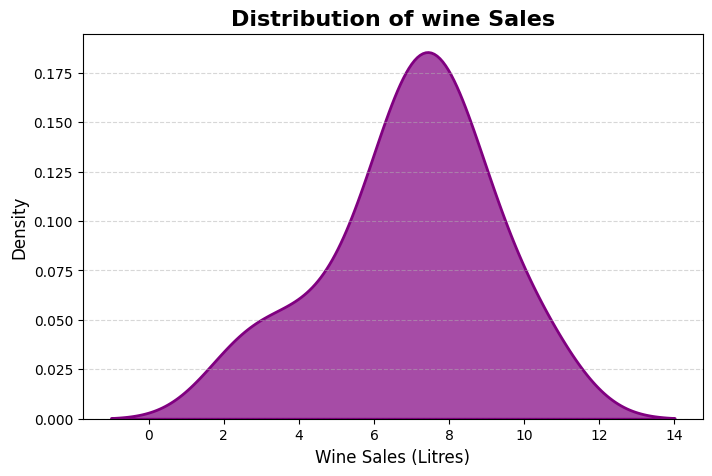

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(sp['wine'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of wine Sales', fontsize=16, fontweight='bold')
plt.xlabel('Wine Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


Typical Consumption: The most common yearly wine purchase per person is between 6 to 8 liters in Saint Petersburg.

Distribution: The distribution of wine sales is slightly right-skewed. This is common in many sales distributions, indicating that while most sales cluster around an average, there are some higher-volume purchases that skew the distribution.

Outliers: Although less frequent, some individuals purchase a substantially larger amount of wine annually, exceeding 10 liters.

Marketing Implication: These findings can be very useful for targeted marketing campaigns. Promotions could be specifically designed to appeal to those consumers who typically purchase 6-8 liters of wine per year to further increase sales within that dominant segment.

In [95]:
fig = px.line(sp,
              x = 'year',
              y= 'wine',
              title = 'General annual wine intake in Saint Petersburg',
              labels = {'wine': 'Wine Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

There has been an upward trend of sales over the years.

The highlight being the sharp increase from (2004 to 2005 and also 2008).

There also seems to be a consistent fluctuation after every 1 to 2 years or rather seasonality where in as amuch it falls with the average sales of 8 to 6 liters annually.

Where i would even argue that in the year 2017 and 2018 there will be an increase!!!

In [96]:
fig = px.histogram(sp, x='champagne', title='Distribution of Champagne sales in Saint Petersburg')
fig.show()

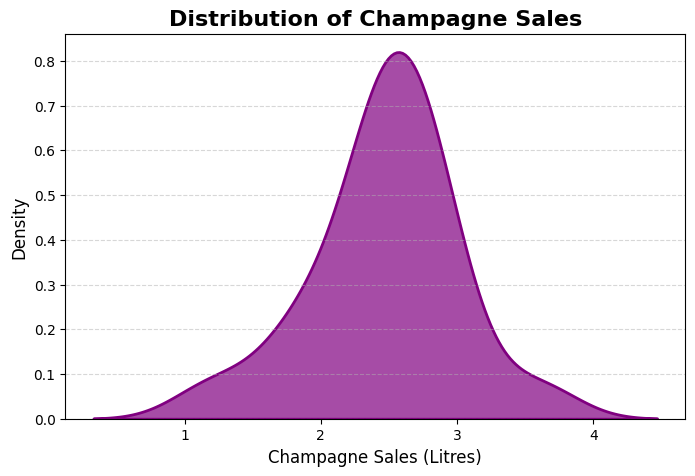

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(sp['champagne'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of Champagne Sales', fontsize=16, fontweight='bold')
plt.xlabel('Champagne Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [98]:
fig = px.line(sp,
              x = 'year',
              y= ['champagne', 'wine'],
              title = 'General annual champagne intake in Saint Petersburg',
              labels = {'champagne': 'Champagne Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

In [102]:
fig = px.histogram(sp, x='brandy', title='Distribution of brandy sales in Saint Petersburg')
fig.show()

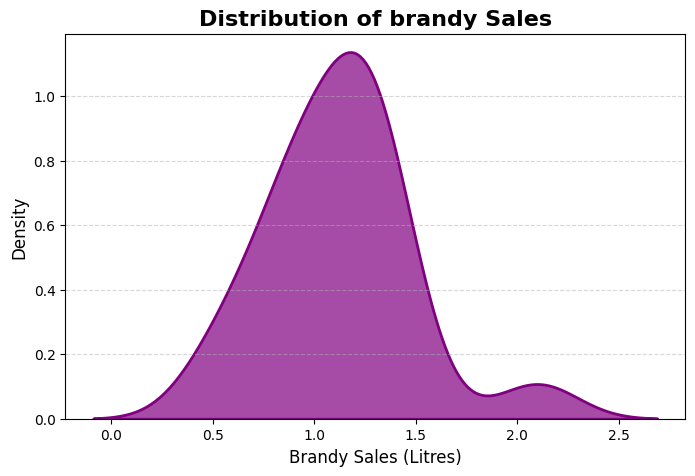

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(sp['brandy'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of brandy Sales', fontsize=16, fontweight='bold')
plt.xlabel('Brandy Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [106]:
fig = px.line(sp,
              x = 'year',
              y= 'brandy',
              title = 'General annual brandy intake in Saint Petersburg',
              labels = {'brandy': 'Brandy Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

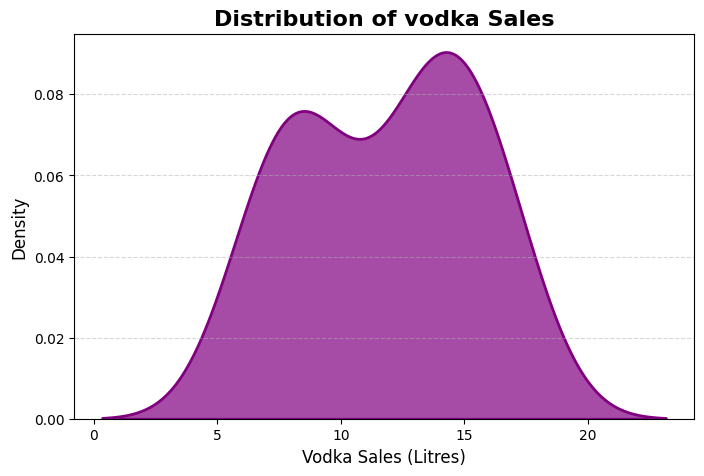

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(sp['vodka'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of vodka Sales', fontsize=16, fontweight='bold')
plt.xlabel('Vodka Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [104]:
fig = px.line(sp,
              x = 'year',
              y= ['vodka', 'wine'],
              title = 'General annual vodka intake in Saint Petersburg',
              labels = {'vodka': 'Vodka Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

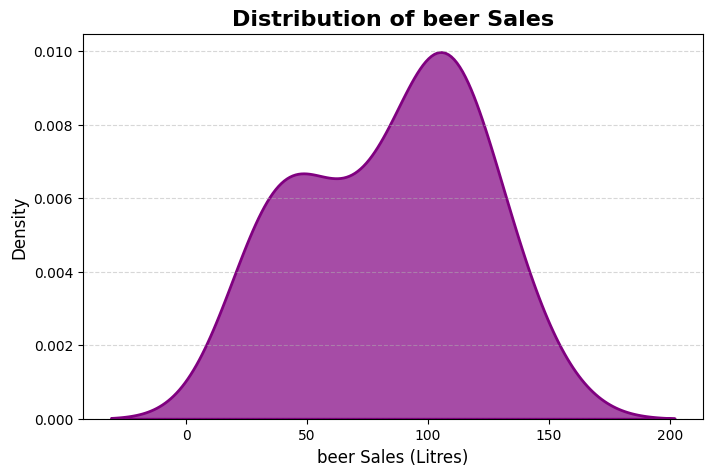

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(sp['beer'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of beer Sales', fontsize=16, fontweight='bold')
plt.xlabel('beer Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [108]:
fig = px.line(sp,
              x = 'year',
              y= 'beer',
              title = 'General annual beer intake in Saint Petersburg',
              labels = {'beer': 'Beer Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

In [73]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(sp,
              x='year',
              y=['wine', 'beer', 'vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [72]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(sp,
              x='year',
              y=['wine','vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [74]:
sp_mean = sp[['beer','wine', 'champagne', 'brandy', 'vodka']].mean()
sp_mean

,0
beer,84.375263
wine,6.952632
champagne,2.468947
brandy,1.117368
vodka,11.821579


In [76]:
import plotly.express as px

# Sort data from largest to smallest
sp_mean_sorted = sp_mean.sort_values(ascending=False)

# Enhanced Bar Graph with Styling
fig = px.bar(
    sp_mean_sorted,
    x=sp_mean_sorted.values,
    y=sp_mean_sorted.index,
    orientation='h',
    title='Mean Distribution of Drinks (Largest to Smallest)',
    text=sp_mean_sorted.values,
    labels={'y': 'Drink Type', 'x': 'Mean Consumption (Litres)'},
    color=sp_mean_sorted.index,  # Different colors for each bar
    color_continuous_scale='viridis'  # Appealing color gradient
)

# Customizing layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format text values
    textposition='outside'       # Values appear outside for clarity
)

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=False),
    template='plotly_dark',
    height=500
)

fig.show()


In [132]:
melted_df = sp.melt(id_vars=['year'], value_vars=['beer', 'wine', 'vodka', 'champagne', 'brandy'],
                    var_name='drink', value_name='value')

print(melted_df)


    year   drink  value
0   1998    beer   27.9
1   1999    beer   57.4
2   2000    beer   68.2
3   2001    beer  101.0
4   2002    beer  104.6
..   ...     ...    ...
90  2012  brandy    1.3
91  2013  brandy    1.0
92  2014  brandy    1.3
93  2015  brandy    1.3
94  2016  brandy    1.2

[95 rows x 3 columns]


In [134]:
import plotly.express as px
import pandas as pd

# Box plot for distribution
fig = px.box(
    melted_df,
    x='drink',
    y='value',
    points='all',    # Show individual points to highlight outliers
    color='drink',  # Different colors for each drink
    title='Distribution of Alcohol Consumption by Drink Type'
)

# Customizing layout
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    template='plotly_dark',
    height=600
)

fig.show()


In [136]:
#Drop all rows with beer in melted_df with the value beer
melted_df = melted_df[melted_df['drink'] != 'beer']
melted_df

,year,drink,value
19,1998,wine,2.7
20,1999,wine,2.6
21,2000,wine,4.4
22,2001,wine,6.2
23,2002,wine,6.3
...,...,...,...
90,2012,brandy,1.3
91,2013,brandy,1.0
92,2014,brandy,1.3
93,2015,brandy,1.3


In [137]:
import plotly.express as px
import pandas as pd

# Box plot for distribution
fig = px.box(
    melted_df,
    x='drink',
    y='value',
    points='all',    # Show individual points to highlight outliers
    color='drink',  # Different colors for each drink
    title='Distribution of Alcohol Consumption by Drink Type'
)

# Customizing layout
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    template='plotly_dark',
    height=600
)

fig.show()


In [138]:
#Drop all rows with beer in melted_df with the value beer
melted_df = melted_df[melted_df['drink'] != 'vodka']
melted_df

,year,drink,value
19,1998,wine,2.70
20,1999,wine,2.60
21,2000,wine,4.40
22,2001,wine,6.20
23,2002,wine,6.30
24,2003,wine,6.60
25,2004,wine,4.70
26,2005,wine,10.30
27,2006,wine,7.60
28,2007,wine,9.10


In [139]:
import plotly.express as px
import pandas as pd

# Box plot for distribution
fig = px.box(
    melted_df,
    x='drink',
    y='value',
    points='all',    # Show individual points to highlight outliers
    color='drink',  # Different colors for each drink
    title='Distribution of Alcohol Consumption by Drink Type'
)

# Customizing layout
fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    template='plotly_dark',
    height=600
)

fig.show()


In [24]:
combined.describe()

,year,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,2007.010343,5.639806,51.556529,11.864447,1.315352,0.526128,-2.999612,11.568003,14.578474,64.600317,69.914163
std,5.487009,2.807385,25.175767,5.093480,0.797095,0.399710,5.485771,2.828702,3.310790,8.712222,12.579230
min,1998.000000,0.100000,1.000000,0.400000,0.100000,0.000000,-15.900000,6.200000,3.900000,37.500000,24.580000
25%,2002.000000,3.600000,32.700000,8.400000,0.800000,0.200000,-6.500000,9.500000,13.000000,59.340000,63.625000
50%,2007.000000,5.400000,50.100000,11.500000,1.200000,0.400000,-3.500000,11.200000,14.700000,64.710000,69.920000
75%,2012.000000,7.400000,67.500000,15.000000,1.670000,0.700000,0.300000,13.200000,16.400000,70.665000,77.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000,16.500000,27.500000,24.900000,89.950000,100.000000


# Comparative Analysis

In [25]:
#Average wine intake yearly
year = drinks.groupby('year')[['wine', 'beer', 'vodka', 'champagne', 'brandy']].mean()
year


,wine,beer,vodka,champagne,brandy
year,,,,,
1998,3.029630,20.419753,12.669136,0.913580,0.228889
1999,3.120988,25.395062,13.469136,0.846914,0.210864
2000,3.343210,30.130864,13.572840,0.892593,0.233704
2001,3.937805,36.343902,14.239024,0.931707,0.275610
2002,4.402439,42.375610,14.787805,0.967073,0.320732
2003,5.184146,47.374390,14.518293,1.035366,0.363415
2004,5.768293,52.489024,14.334146,1.093902,0.392683
2005,5.970732,54.497561,13.674390,1.171951,0.411111
2006,5.789024,61.536585,13.086585,1.217073,0.437037


In [68]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(year,
              x=year.index,
              y=['wine', 'beer', 'vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Russia',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [27]:
# Finding the mean of each drink in the dataset then creating a table for them
drink_mean = combined[['beer','wine', 'champagne', 'brandy', 'vodka']].mean()
drink_mean




,0
beer,51.556529
wine,5.639806
champagne,1.315352
brandy,0.526128
vodka,11.864447


In [28]:
import plotly.express as px

# Sort data from largest to smallest
drink_mean_sorted = drink_mean.sort_values(ascending=False)

# Enhanced Bar Graph with Styling
fig = px.bar(
    drink_mean_sorted,
    x=drink_mean_sorted.values,
    y=drink_mean_sorted.index,
    orientation='h',
    title='Mean Distribution of Drinks (Largest to Smallest)',
    text=drink_mean_sorted.values,
    labels={'y': 'Drink Type', 'x': 'Mean Consumption (Litres)'},
    color=drink_mean_sorted.index,  # Different colors for each bar
    color_continuous_scale='viridis'  # Appealing color gradient
)

# Customizing layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format text values
    textposition='outside'       # Values appear outside for clarity
)

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=False),
    template='plotly_dark',
    height=500
)

fig.show()


Generally over the years, beer is the most consumed in russia at a mean of 51.56 followed by vodka at 11.86 then wine at 5.64 then champagne at 1.32 lastly brandy at o.53.

 ### Why is beer the mot popular?
** Historical Shift:** Until 2011, beer was classified as food if its alcohol content was below 10%, resulting in less regulation. This changed in 2011, boosting beer's visibility.

**Market Growth:** By 2010, Russia was the world's fourth-largest beer market.

**Domestic Production:** Major brands like Baltika expanded across Russia, making beer widely available.

**Consumer Preferences:** Russians favor pale lagers, often categorized by color.

**Social Factors:** Beer is commonly enjoyed at social events and with traditional Russian foods.

**Craft Beer Rise:** Cities like St. Petersburg and Moscow have seen a growing craft beer scene, adding diversity to the market.


## Why is beer the second most popilar drinks?
While Russia is the largest vodka producer in the world, with over 30% of global production, the vast majority (over 90%) of Russian-made vodka is consumed domestically.

N/B: Agruable this could also contribute to thease of access and also the price must be low thus many people  acess it.




### What about the three unpopular drin in theier ranks; wine, champagne and brady?
 Is it beacuse the quantity, the price or culture  or abv that makes them unpopular?

#### Correlations between different drinks

In [29]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    combined,
    y='wine',
    x='champagne',
    title='wine vs champagne',
    labels={'champagne': 'Champagne', 'wine': 'Wine Consumption (liters per capita)'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


**Wine vs Champagne**

There’s a stronger positive correlation between wine and champagne consumption compared to the first plot. As champagne consumption rises, wine consumption tends to increase more consistently.

The data points are more closely aligned with the trendline, indicating a stronger correlation.

In [30]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    combined,
    y='brandy',
    x='vodka',
    title='brandy vs vodka',
    labels={'champagne': 'Champagne', 'wine': 'Wine Consumption (liters per capita)'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


**Brandy vs Vodka**

There’s a weak positive correlation between vodka and brandy consumption. As vodka consumption increases, brandy consumption shows a slight upward trend. However, the data points are widely scattered, indicating a low correlation strength.

The clustering of points at lower vodka values with varying brandy values suggests that brandy consumption remains somewhat stable, regardless of vodka intake in many cases.

In [31]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    combined,
    y='brandy',
    x='champagne',
    title='brandy vs champagne',
    labels={'champagne': 'Champagne', 'brandy': 'brandy'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


**Brandy vs Champagne**
The brandy vs champagne plot demonstrates a stronger, more consistent relationship.

The points are more tightly grouped along the trend line, indicating a stronger positive correlation.

The trend line has a clearer upward slope, suggesting that as champagne values increase, brandy values tend to increase as well.

There are still some outliers, but the relationship appears more linear compared to the first plot.

In [32]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    combined,
    y='brandy',
    x='wine',
    title='brandy vs wine',
    labels={'champagne': 'Champagne', 'wine': 'wine'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


**Brandy vs Wine**

The points are widely dispersed, indicating a weaker correlation.

The trend line shows a slight positive slope, suggesting some relationship, but the data appears noisy.

There are several clusters of points along horizontal bands, which might indicate repeated values or specific ranges for wine and brandy data.

In [77]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    combined,
    y='vodka',
    x='wine',
    title='vodka vs wine',
    labels={'vodka': 'Vodka', 'wine': 'wine'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


Positive Correlation (Weak)

The trend line shows a slight upward slope, suggesting a weak positive correlation between vodka and wine consumption. As wine consumption increases, vodka consumption tends to increase slightly.

Data Distribution

Most data points are concentrated in the lower ranges for both vodka and wine (e.g., wine values between 0–5 and vodka values between 0–20). This indicates that higher consumption levels for both are less common.

Outliers

There are several outliers where vodka consumption is significantly higher despite lower wine values, and vice versa.

In [33]:
import pandas as pd

# Assuming your dataset is named df
wine_df =combined.groupby('region').agg({
    'champagne': 'mean',
    'urbanization': 'mean'

}).reset_index()

print(wine_df.head())



               region  champagne  urbanization
0          Altai Krai   1.207368     54.184737
1      Altai Republic   0.934737     27.053158
2         Amur Oblast   1.115789     66.601053
3  Arkhangelsk Oblast   1.631053     75.452632
4    Astrakhan Oblast   0.861579     67.276316


In [34]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    wine_df,
    y='urbanization',
    x='champagne',
    title='urbanization vs champagne',
    labels={'champagne': 'Champagne', 'urbanization': 'Urbanization'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


In [35]:
import pandas as pd

# Assuming your dataset is named df
wine_df =combined.groupby('region').agg({
    'wine': 'mean',
    'urbanization': 'mean'

}).reset_index()

print(wine_df.head())



               region      wine  urbanization
0          Altai Krai  3.174211     54.184737
1      Altai Republic  5.190000     27.053158
2         Amur Oblast  5.221579     66.601053
3  Arkhangelsk Oblast  8.670000     75.452632
4    Astrakhan Oblast  4.469474     67.276316


In [36]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    wine_df,
    y='urbanization',
    x='wine',
    title='urbanization vs wine',
    labels={'wine': 'Wine', 'urbanization': 'Urbanization'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


In [37]:
import pandas as pd

# Assuming your dataset is named df
wine_df =combined.groupby('region').agg({
    'brandy': 'mean',
    'urbanization': 'mean'

}).reset_index()

print(wine_df.head())



               region    brandy  urbanization
0          Altai Krai  0.236842     54.184737
1      Altai Republic  0.253684     27.053158
2         Amur Oblast  0.396842     66.601053
3  Arkhangelsk Oblast  0.870526     75.452632
4    Astrakhan Oblast  0.361053     67.276316


In [38]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    wine_df,
    y='urbanization',
    x='brandy',
    title='urbanization vs brandy',
    labels={'brandy': 'Brandy', 'urbanization': 'Urbanization'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


In [39]:
import pandas as pd

# Assuming your dataset is named df
wine_df =combined.groupby('region').agg({
    'beer': 'mean',
    'urbanization': 'mean'

}).reset_index()

print(wine_df.head())



               region       beer  urbanization
0          Altai Krai  48.373158     54.184737
1      Altai Republic  36.724211     27.053158
2         Amur Oblast  53.377368     66.601053
3  Arkhangelsk Oblast  47.036842     75.452632
4    Astrakhan Oblast  54.695263     67.276316


In [40]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    wine_df,
    y='urbanization',
    x='beer',
    title='urbanization vs brandy',
    labels={'brandy': 'Brandy', 'urbanization': 'Urbanization'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


In [41]:
import pandas as pd

# Assuming your dataset is named df
wine_df =combined.groupby('region').agg({
    'vodka': 'mean',
    'urbanization': 'mean'

}).reset_index()

print(wine_df.head())



               region      vodka  urbanization
0          Altai Krai   9.465789     54.184737
1      Altai Republic   9.683684     27.053158
2         Amur Oblast  14.216842     66.601053
3  Arkhangelsk Oblast  17.381053     75.452632
4    Astrakhan Oblast   9.296842     67.276316


In [42]:
import plotly.express as px

# Scatterplot to visualize the correlation between population and wine consumption
fig = px.scatter(
    wine_df,
    y='urbanization',
    x='vodka',
    title='urbanization vs brandy',
    labels={'brandy': 'Brandy', 'urbanization': 'Urbanization'},
    #color='year',  # Optional: Add color to distinguish years
    size_max=10,
    trendline='ols'  # Adds an Ordinary Least Squares (OLS) regression trend line
)

# Enhance visual aesthetics
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    template='plotly_dark'  # Optional: Choose a theme like 'plotly_dark', 'seaborn', etc.
)

fig.show()


Generally , there is a correlation between urbaization and each drink in as much as it seems weak. Suggsting that somehow urbaization affecs the type of drinks and the quantity itself.

In [43]:
combined.describe()

,year,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,2007.010343,5.639806,51.556529,11.864447,1.315352,0.526128,-2.999612,11.568003,14.578474,64.600317,69.914163
std,5.487009,2.807385,25.175767,5.093480,0.797095,0.399710,5.485771,2.828702,3.310790,8.712222,12.579230
min,1998.000000,0.100000,1.000000,0.400000,0.100000,0.000000,-15.900000,6.200000,3.900000,37.500000,24.580000
25%,2002.000000,3.600000,32.700000,8.400000,0.800000,0.200000,-6.500000,9.500000,13.000000,59.340000,63.625000
50%,2007.000000,5.400000,50.100000,11.500000,1.200000,0.400000,-3.500000,11.200000,14.700000,64.710000,69.920000
75%,2012.000000,7.400000,67.500000,15.000000,1.670000,0.700000,0.300000,13.200000,16.400000,70.665000,77.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000,16.500000,27.500000,24.900000,89.950000,100.000000


## How can we make the unpopular brands popular?
From the scatter plot we can see that champagne and wine have a strong correlation and also brandy and champagne ahve a storng positive correlation.

### Solution/Suggestion
What if we interchange? Wherever brandy is doing poorly we recommend champagne and wherever champagne is doing poorly we ecommend wine and vice versa?

In [44]:
combined.describe()

,year,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,2007.010343,5.639806,51.556529,11.864447,1.315352,0.526128,-2.999612,11.568003,14.578474,64.600317,69.914163
std,5.487009,2.807385,25.175767,5.093480,0.797095,0.399710,5.485771,2.828702,3.310790,8.712222,12.579230
min,1998.000000,0.100000,1.000000,0.400000,0.100000,0.000000,-15.900000,6.200000,3.900000,37.500000,24.580000
25%,2002.000000,3.600000,32.700000,8.400000,0.800000,0.200000,-6.500000,9.500000,13.000000,59.340000,63.625000
50%,2007.000000,5.400000,50.100000,11.500000,1.200000,0.400000,-3.500000,11.200000,14.700000,64.710000,69.920000
75%,2012.000000,7.400000,67.500000,15.000000,1.670000,0.700000,0.300000,13.200000,16.400000,70.665000,77.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000,16.500000,27.500000,24.900000,89.950000,100.000000


In [45]:
wine_value = combined.groupby('region')['wine'].mean()
wine_value = wine_value.sort_values(ascending=False)
wine_value.head(31)



,wine
region,
Republic of Karelia,10.762105
Pskov Oblast,10.307895
Vologda Oblast,9.328421
Komi Republic,9.223684
Novgorod Oblast,9.184737
Nenets Autonomous Okrug,8.985789
Arkhangelsk Oblast,8.670000
Murmansk Oblast,7.853684
Leningrad Oblast,7.786316


In [46]:
import plotly.express as px
import pandas as pd

# Sort and select top 30 values
wine_value = wine_value.sort_values(ascending=False).head(30).reset_index()

# Highlight Saint Petersburg
wine_value['color'] = wine_value['region'].apply(lambda x: 'Saint Petersburg' if x == 'Saint Petersburg' else 'Other')

# Bar Plot
fig = px.bar(wine_value,
             x='wine',
             y='region',
             color='color',
             color_discrete_map={'Saint Petersburg': 'red', 'Other': 'blue'},
             title='Value Distribution by Region (Highlighting Saint Petersburg)',
             orientation='h')

# Improve layout
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  height=800,  # Increase height to display all regions
                  margin=dict(l=150),
                  showlegend=False)


fig.show()


In [47]:
champ_value = combined.groupby('region')['champagne'].mean()
champ_value = champ_value.sort_values(ascending=False)
champ_value.head(31)

,champagne
region,
Moscow,4.386316
Magadan Oblast,2.934737
Kamchatka Krai,2.736842
Saint Petersburg,2.468947
Sakhalin Oblast,2.420526
Murmansk Oblast,2.406316
Leningrad Oblast,2.090526
Chukotka Autonomous Okrug,2.057895
Khabarovsk Krai,1.977895


### Champagne

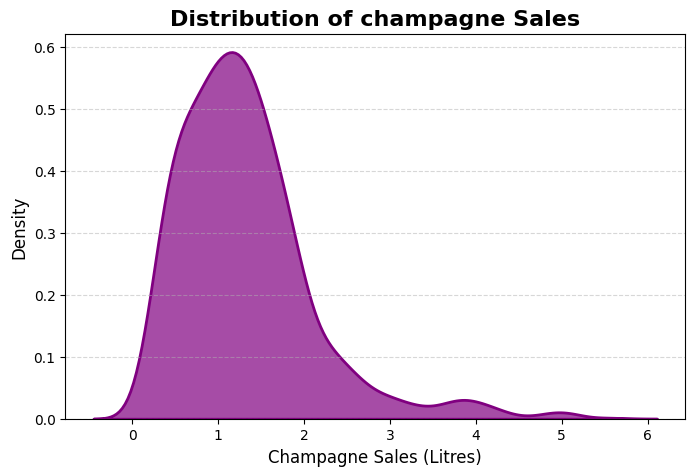

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(combined['champagne'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of champagne Sales', fontsize=16, fontweight='bold')
plt.xlabel('Champagne Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [52]:
import plotly.express as px
import pandas as pd

# Sort and select top 30 values
champ_value = champ_value.sort_values(ascending=False).head(30).reset_index()

# Highlight Saint Petersburg
champ_value['color'] = champ_value['region'].apply(lambda x: 'Saint Petersburg' if x == 'Saint Petersburg' else 'Other')

# Bar Plot
fig = px.bar(champ_value,
             x='champagne',
             y='region',
             color='color',
             color_discrete_map={'Saint Petersburg': 'red', 'Other': 'blue'},
             title='Value Distribution by Region (Highlighting Saint Petersburg)',
             orientation='h')

# Layout improvements
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    height=800,  # Increase height to display all regions
    margin=dict(l=150)  # Add margin for longer region names
)

fig.show()


### Brandy

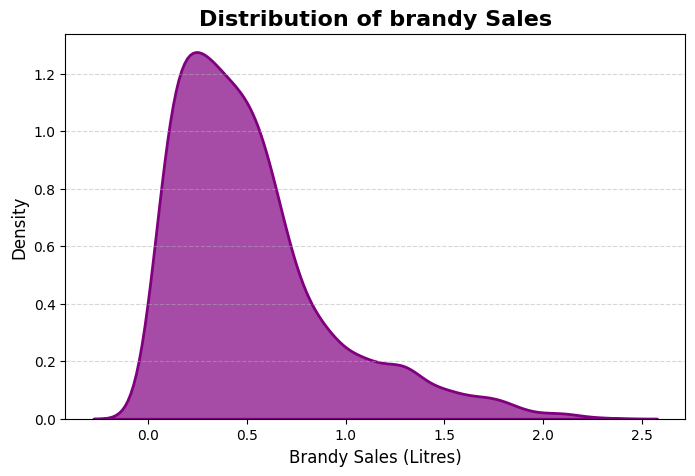

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(combined['brandy'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of brandy Sales', fontsize=16, fontweight='bold')
plt.xlabel('Brandy Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [54]:
brandy_value = combined.groupby('region')['brandy'].mean()
brandy_value = brandy_value.sort_values(ascending=False)
brandy_value.head(31)

,brandy
region,
Moscow,1.257895
Kamchatka Krai,1.245263
Kaliningrad Oblast,1.238421
Murmansk Oblast,1.127368
Saint Petersburg,1.117368
Leningrad Oblast,1.022105
Moscow Oblast,1.000526
Sevastopol,1.000000
Magadan Oblast,0.989474


In [55]:
import plotly.express as px
import pandas as pd

# Sort and select top 30 values
brandy_value = brandy_value.sort_values(ascending=False).head(30).reset_index()

# Highlight Saint Petersburg
brandy_value['color'] = champ_value['region'].apply(lambda x: 'Saint Petersburg' if x == 'Saint Petersburg' else 'Other')

# Bar Plot
fig = px.bar(brandy_value,
             x='brandy',
             y='region',
             color='color',
             color_discrete_map={'Saint Petersburg': 'red', 'Other': 'blue'},
             title='Value Distribution by Region (Highlighting Saint Petersburg)',
             orientation='h')

# Improve layout
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  height=800,  # Increase height to display all regions
                  margin=dict(l=150),
                  showlegend=False)

fig.show()


In [56]:
combined.describe()

,year,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
count,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000,1547.000000
mean,2007.010343,5.639806,51.556529,11.864447,1.315352,0.526128,-2.999612,11.568003,14.578474,64.600317,69.914163
std,5.487009,2.807385,25.175767,5.093480,0.797095,0.399710,5.485771,2.828702,3.310790,8.712222,12.579230
min,1998.000000,0.100000,1.000000,0.400000,0.100000,0.000000,-15.900000,6.200000,3.900000,37.500000,24.580000
25%,2002.000000,3.600000,32.700000,8.400000,0.800000,0.200000,-6.500000,9.500000,13.000000,59.340000,63.625000
50%,2007.000000,5.400000,50.100000,11.500000,1.200000,0.400000,-3.500000,11.200000,14.700000,64.710000,69.920000
75%,2012.000000,7.400000,67.500000,15.000000,1.670000,0.700000,0.300000,13.200000,16.400000,70.665000,77.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000,16.500000,27.500000,24.900000,89.950000,100.000000


In [57]:
#Grouping by region based on mean of each drink
mean_values = combined.groupby('region')[['wine', 'champagne', 'brandy', 'beer', 'vodka', 'urbanization']].mean()
mean_values

,wine,champagne,brandy,beer,vodka,urbanization
region,,,,,,
Altai Krai,3.174211,1.207368,0.236842,48.373158,9.465789,54.184737
Altai Republic,5.190000,0.934737,0.253684,36.724211,9.683684,27.053158
Amur Oblast,5.221579,1.115789,0.396842,53.377368,14.216842,66.601053
Arkhangelsk Oblast,8.670000,1.631053,0.870526,47.036842,17.381053,75.452632
Astrakhan Oblast,4.469474,0.861579,0.361053,54.695263,9.296842,67.276316
...,...,...,...,...,...,...
Vologda Oblast,9.328421,0.857368,0.517895,67.206842,17.217895,69.794211
Voronezh Oblast,4.637895,1.500000,0.402105,54.911053,9.916316,63.223684
Yamalo-Nenets Autonomous Okrug,5.312105,1.485789,0.951579,80.137895,15.093158,84.038947


In [58]:
#Filter out regions for me whose value in terms of wine is less than 6.952632, in tems of champagne is greater than 1.315352, interms of brandy the value is greater than:0.526128 and in terms of urbanization the value is greater than:69.914163
# Filter conditions
filtered_df = mean_values[
    (mean_values['wine'] <= 6.952632) &
    (mean_values['champagne'] > 1.315352) &
    (mean_values['brandy'] > 0.526128) &
    (mean_values['urbanization'] > 69.914163)
]

filtered_df

,wine,champagne,brandy,beer,vodka,urbanization
region,,,,,,
Chelyabinsk Oblast,6.944211,1.465263,0.560526,74.147368,12.943684,81.919474
Irkutsk Oblast,6.352632,1.326316,0.532105,61.862632,12.920000,79.391053
Kaluga Oblast,5.787368,1.477895,0.534737,54.485789,11.343158,75.233158
Khabarovsk Krai,5.220526,1.977895,0.704737,70.191579,15.377368,81.244211
Khanty–Mansi Autonomous Okrug – Yugra,5.320526,1.446842,0.924211,73.845263,15.012105,91.297895
Krasnoyarsk Krai,5.301053,1.443684,0.544737,64.717895,11.383158,75.910526
Magadan Oblast,6.661579,2.934737,0.989474,43.868421,18.733158,93.631579
Moscow Oblast,6.126316,1.703684,1.000526,62.602105,15.187368,80.181579
Primorsky Krai,4.243684,1.653684,0.553684,52.837895,12.295263,76.856316


In [59]:
#Filter out regions for me whose value in terms of wine is less than 6.952632, in tems of champagne is greater than 1.315352, interms of brandy the value is greater than:0.526128 and in terms of urbanization the value is greater than:69.914163
# Filter conditions
filtered_df = mean_values[
    (mean_values['wine'] >= 6.952632) &
    (mean_values['champagne'] < 1.315352) &
    (mean_values['brandy'] < 0.526128) &
    (mean_values['urbanization'] < 69.914163)
]

filtered_df

,wine,champagne,brandy,beer,vodka,urbanization
region,,,,,,
Pskov Oblast,10.307895,1.173158,0.440000,47.630000,10.663158,68.181579
Vologda Oblast,9.328421,0.857368,0.517895,67.206842,17.217895,69.794211


In [60]:
#Filter out regions for me whose value in terms of wine is less than 6.952632, in tems of champagne is greater than 1.315352, interms of brandy the value is greater than:0.526128 and in terms of urbanization the value is greater than:69.914163
# Filter conditions
filtered_df = mean_values[
    (mean_values['wine'] < 6.952632) &
    (mean_values['champagne'] >= 1.315352) &
    (mean_values['brandy'] < 0.526128) &
    (mean_values['urbanization'] < 69.914163)
]

filtered_df

,wine,champagne,brandy,beer,vodka,urbanization
region,,,,,,
Oryol Oblast,4.952632,1.408421,0.393158,45.577895,8.937368,64.677368
Rostov Oblast,4.526842,1.473684,0.405263,48.446842,6.093158,67.397895
Ryazan Oblast,4.692632,1.326842,0.331579,50.722632,9.816842,69.886842
Sakha (Yakutia) Republic,4.745789,1.508947,0.460526,38.381053,13.387895,64.414737
Voronezh Oblast,4.637895,1.500000,0.402105,54.911053,9.916316,63.223684


In [151]:
wine_df = mean_values[
    (mean_values['wine'] <= 6.952632)
]

wine_df.sort_values(by='wine', ascending=False).head(60)

,wine,champagne,brandy,beer,vodka,urbanization
region,,,,,,
Saint Petersburg,6.952632,2.468947,1.117368,84.375263,11.821579,100.000000
Chelyabinsk Oblast,6.944211,1.465263,0.560526,74.147368,12.943684,81.919474
Zabaykalsky Krai,6.806316,1.114211,0.439474,67.812105,14.237368,65.070000
Tomsk Oblast,6.700526,1.175263,0.471053,44.952632,12.781053,69.169474
Magadan Oblast,6.661579,2.934737,0.989474,43.868421,18.733158,93.631579
Penza Oblast,6.635263,0.753684,0.231053,56.835263,6.625789,66.192632
Bryansk Oblast,6.592632,0.957368,0.270000,43.133158,8.818947,68.835263
Mari El Republic,6.530000,0.744737,0.308421,28.615263,11.446316,63.409474
Irkutsk Oblast,6.352632,1.326316,0.532105,61.862632,12.920000,79.391053


In [121]:
champ_df = mean_values[
    (mean_values['champagne'] >= 1.315352)
]

champ_df.sort_values(by='champagne', ascending=False).head(60)

,wine,champagne,brandy,beer,vodka,urbanization
region,,,,,,
Moscow,7.381579,4.386316,1.257895,83.688421,19.022105,99.757895
Magadan Oblast,6.661579,2.934737,0.989474,43.868421,18.733158,93.631579
Kamchatka Krai,7.278421,2.736842,1.245263,59.572105,19.712105,79.119474
Saint Petersburg,6.952632,2.468947,1.117368,84.375263,11.821579,100.000000
Sakhalin Oblast,6.200000,2.420526,0.943158,49.522105,18.179474,82.321053
Murmansk Oblast,7.853684,2.406316,1.127368,45.134737,16.694737,92.433684
Leningrad Oblast,7.786316,2.090526,1.022105,61.000000,15.809474,65.798947
Chukotka Autonomous Okrug,4.175263,2.057895,0.935789,15.416316,12.712632,66.373158
Khabarovsk Krai,5.220526,1.977895,0.704737,70.191579,15.377368,81.244211


In [150]:
brandy_df = mean_values[
    (mean_values['brandy'] >= 0.526128)
]

brandy_df.sort_values(by='brandy', ascending=False).head(60)

,wine,champagne,brandy,beer,vodka,urbanization
region,,,,,,
Moscow,7.381579,4.386316,1.257895,83.688421,19.022105,99.757895
Kamchatka Krai,7.278421,2.736842,1.245263,59.572105,19.712105,79.119474
Kaliningrad Oblast,7.635789,1.522632,1.238421,55.923684,14.134211,77.568421
Murmansk Oblast,7.853684,2.406316,1.127368,45.134737,16.694737,92.433684
Saint Petersburg,6.952632,2.468947,1.117368,84.375263,11.821579,100.000000
Leningrad Oblast,7.786316,2.090526,1.022105,61.000000,15.809474,65.798947
Moscow Oblast,6.126316,1.703684,1.000526,62.602105,15.187368,80.181579
Sevastopol,5.200000,1.900000,1.000000,19.050000,5.550000,92.550000
Magadan Oblast,6.661579,2.934737,0.989474,43.868421,18.733158,93.631579


## Chelyabinsk Oblast

In [80]:
co = data[data['region']=='Chelyabinsk Oblast']
co

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
75,1998,Chelyabinsk Oblast,4.70,27.9,11.10,1.40,0.20,-4.0,8.9,12.9,73.68,81.46
156,1999,Chelyabinsk Oblast,4.50,32.5,14.00,0.90,0.10,-5.9,8.5,14.4,71.69,81.48
237,2000,Chelyabinsk Oblast,4.30,46.3,15.70,1.00,0.20,-6.6,8.9,15.5,68.96,81.50
319,2001,Chelyabinsk Oblast,4.40,45.2,16.20,1.20,0.20,-6.3,9.3,15.6,66.54,81.58
401,2002,Chelyabinsk Oblast,4.10,55.7,16.80,1.10,0.50,-6.3,10.1,16.4,64.83,81.73
483,2003,Chelyabinsk Oblast,4.70,65.1,16.40,1.20,0.70,-6.1,10.4,16.6,62.83,81.82
565,2004,Chelyabinsk Oblast,6.10,81.0,17.50,1.30,0.80,-5.5,10.7,16.3,61.04,81.90
646,2005,Chelyabinsk Oblast,8.00,90.9,19.50,1.50,0.80,-5.9,10.4,16.4,60.06,82.10
727,2006,Chelyabinsk Oblast,8.20,103.9,16.00,1.50,0.90,-4.6,10.8,15.5,59.54,81.70
808,2007,Chelyabinsk Oblast,12.00,118.3,14.90,1.70,0.90,-3.1,11.8,15.0,59.62,81.80


In [81]:
fig = px.histogram(co, x='wine', title='Distribution of wine sales in Saint Petersburg')
fig.show()

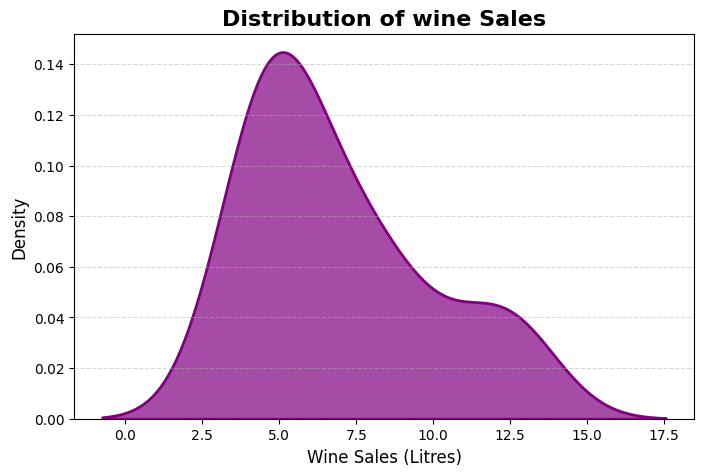

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(co['wine'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of wine Sales', fontsize=16, fontweight='bold')
plt.xlabel('Wine Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [83]:
fig = px.line(co,
              x = 'year',
              y= 'wine',
              title = 'General annual wine intake in 	Chelyabinsk Oblast ',
              labels = {'wine': 'Wine Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

In [85]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(co,
              x='year',
              y=['wine', 'beer', 'vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Chelyabinsk Oblast ',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [91]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(co,
              x='year',
              y=['wine','vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Chelyabinsk Oblast',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [89]:
co_mean = co[['beer','wine', 'champagne', 'brandy', 'vodka']].mean()
co_mean

,0
beer,74.147368
wine,6.944211
champagne,1.465263
brandy,0.560526
vodka,12.943684


In [90]:
import plotly.express as px

# Sort data from largest to smallest
co_mean_sorted = co_mean.sort_values(ascending=False)

# Enhanced Bar Graph with Styling
fig = px.bar(
    co_mean_sorted,
    x=co_mean_sorted.values,
    y=co_mean_sorted.index,
    orientation='h',
    title='Mean Distribution of Drinks (Largest to Smallest)',
    text=co_mean_sorted.values,
    labels={'y': 'Drink Type', 'x': 'Mean Consumption (Litres)'},
    color=co_mean_sorted.index,  # Different colors for each bar
    color_continuous_scale='viridis'  # Appealing color gradient
)

# Customizing layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format text values
    textposition='outside'       # Values appear outside for clarity
)

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=False),
    template='plotly_dark',
    height=500
)

fig.show()


### Zabaykalsky Krai

In [158]:
zk = data[data['region']=='Zabaykalsky Krai']
zk

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
15,1998,Zabaykalsky Krai,0.90,8.60,5.00,0.20,0.10,0.2,12.3,12.1,71.80,63.79
96,1999,Zabaykalsky Krai,1.10,11.50,5.80,0.20,0.10,-2.8,11.5,14.3,69.14,63.84
177,2000,Zabaykalsky Krai,1.90,16.40,7.00,0.30,0.10,-2.7,11.8,14.5,66.32,63.60
258,2001,Zabaykalsky Krai,3.50,23.80,8.60,0.40,0.10,-2.8,12.5,15.3,64.35,63.65
340,2002,Zabaykalsky Krai,4.70,31.30,10.90,0.50,0.10,-3.1,13.1,16.2,63.01,63.82
422,2003,Zabaykalsky Krai,5.90,38.10,12.40,0.60,0.10,-3.3,13.5,16.8,60.89,63.93
504,2004,Zabaykalsky Krai,15.70,190.40,40.60,3.00,1.80,-3.3,13.8,17.1,58.74,64.00
586,2005,Zabaykalsky Krai,16.30,202.10,31.00,3.00,1.20,-3.7,13.5,17.3,57.35,64.00
667,2006,Zabaykalsky Krai,13.70,207.30,31.70,3.10,1.30,-1.6,13.9,15.6,56.40,64.20
748,2007,Zabaykalsky Krai,6.70,61.90,13.50,0.80,0.20,0.5,14.9,14.5,56.07,64.60


In [161]:
zk

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
15,1998,Zabaykalsky Krai,0.90,8.60,5.00,0.20,0.10,0.2,12.3,12.1,71.80,63.79
96,1999,Zabaykalsky Krai,1.10,11.50,5.80,0.20,0.10,-2.8,11.5,14.3,69.14,63.84
177,2000,Zabaykalsky Krai,1.90,16.40,7.00,0.30,0.10,-2.7,11.8,14.5,66.32,63.60
258,2001,Zabaykalsky Krai,3.50,23.80,8.60,0.40,0.10,-2.8,12.5,15.3,64.35,63.65
340,2002,Zabaykalsky Krai,4.70,31.30,10.90,0.50,0.10,-3.1,13.1,16.2,63.01,63.82
422,2003,Zabaykalsky Krai,5.90,38.10,12.40,0.60,0.10,-3.3,13.5,16.8,60.89,63.93
504,2004,Zabaykalsky Krai,15.70,190.40,40.60,3.00,1.80,-3.3,13.8,17.1,58.74,64.00
586,2005,Zabaykalsky Krai,16.30,202.10,31.00,3.00,1.20,-3.7,13.5,17.3,57.35,64.00
667,2006,Zabaykalsky Krai,13.70,207.30,31.70,3.10,1.30,-1.6,13.9,15.6,56.40,64.20
748,2007,Zabaykalsky Krai,6.70,61.90,13.50,0.80,0.20,0.5,14.9,14.5,56.07,64.60


In [155]:
fig = px.histogram(zk, x='wine', title='Distribution of wine sales in Saint Petersburg')
fig.show()

In [163]:
fig = px.line(zk,
              x = 'year',
              y= 'wine',
              title = 'General annual wine intake in Saint Petersburg',
              labels = {'wine': 'Wine Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

In [164]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(zk,
              x='year',
              y=['wine', 'beer', 'vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [165]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(zk,
              x='year',
              y=['wine','vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [166]:
zk_mean = zk[['beer','wine', 'champagne', 'brandy', 'vodka']].mean()
zk_mean

,0
beer,67.812105
wine,6.806316
champagne,1.114211
brandy,0.439474
vodka,14.237368


TypeError: 'DataFrame' object is not callable

<Figure size 400x100 with 1 Axes>

In [167]:
import plotly.express as px

# Sort data from largest to smallest
zk_mean_sorted = zk_mean.sort_values(ascending=False)

# Enhanced Bar Graph with Styling
fig = px.bar(
    zk_mean_sorted,
    x=zk_mean_sorted.values,
    y=zk_mean_sorted.index,
    orientation='h',
    title='Mean Distribution of Drinks (Largest to Smallest)',
    text=zk_mean_sorted.values,
    labels={'y': 'Drink Type', 'x': 'Mean Consumption (Litres)'},
    color=zk_mean_sorted.index,  # Different colors for each bar
    color_continuous_scale='viridis'  # Appealing color gradient
)

# Customizing layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format text values
    textposition='outside'       # Values appear outside for clarity
)

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=False),
    template='plotly_dark',
    height=500
)

fig.show()


TypeError: 'DataFrame' object is not callable

<Figure size 400x100 with 1 Axes>

### Nizhny Novgorod Oblast

In [110]:
nno = data[data['region']=='Nizhny Novgorod Oblast']
nno

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
41,1998,Nizhny Novgorod Oblast,3.40,14.80,9.60,1.00,0.20,-8.1,7.8,15.9,78.56,77.69
122,1999,Nizhny Novgorod Oblast,3.80,25.40,10.60,1.00,0.20,-9.7,7.4,17.1,76.28,77.79
203,2000,Nizhny Novgorod Oblast,3.90,27.30,9.70,1.00,0.10,-10.4,7.7,18.1,73.48,77.86
285,2001,Nizhny Novgorod Oblast,4.80,34.70,9.80,0.90,0.20,-10.8,7.9,18.7,70.95,77.95
367,2002,Nizhny Novgorod Oblast,5.20,39.80,10.60,1.00,0.20,-11.2,8.1,19.3,69.27,78.07
449,2003,Nizhny Novgorod Oblast,5.80,44.80,11.10,1.10,0.20,-11.0,9.0,20.0,66.80,78.21
531,2004,Nizhny Novgorod Oblast,6.20,51.00,11.90,1.20,0.20,-10.7,9.1,19.8,64.61,78.30
612,2005,Nizhny Novgorod Oblast,6.90,60.10,11.90,1.40,0.30,-11.1,8.9,20.0,63.46,78.10
693,2006,Nizhny Novgorod Oblast,7.70,65.80,14.10,1.70,0.30,-9.9,9.1,19.0,62.41,78.30
774,2007,Nizhny Novgorod Oblast,7.10,70.00,12.00,1.80,0.50,-8.4,9.9,18.3,62.04,78.40


In [111]:
fig = px.histogram(nno, x='wine', title='Distribution of wine sales in Saint Petersburg')
fig.show()

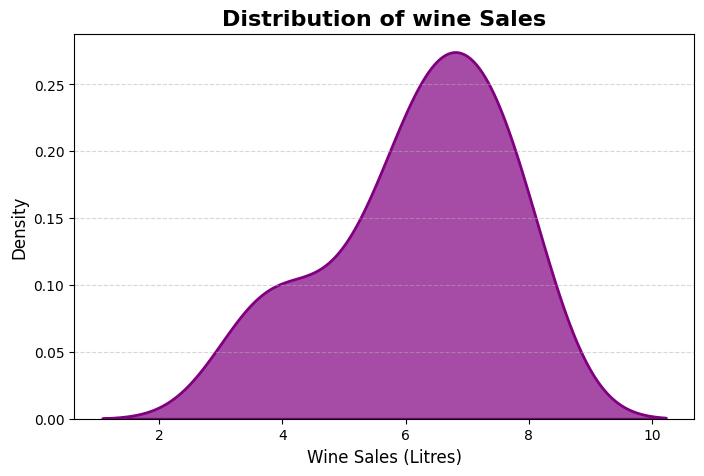

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(nno['wine'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of wine Sales', fontsize=16, fontweight='bold')
plt.xlabel('Wine Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [113]:
fig = px.line(nno,
              x = 'year',
              y= 'wine',
              title = 'General annual wine intake in Saint Petersburg',
              labels = {'wine': 'Wine Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

In [114]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(nno,
              x='year',
              y=['wine', 'beer', 'vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [115]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(nno,
              x='year',
              y=['wine','vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [118]:
nno_mean = nno[['beer','wine', 'champagne', 'brandy', 'vodka']].mean()
nno_mean

,0
beer,49.356316
wine,6.187368
champagne,1.356842
brandy,0.444737
vodka,10.367368


In [119]:
import plotly.express as px

# Sort data from largest to smallest
nno_mean_sorted = nno_mean.sort_values(ascending=False)

# Enhanced Bar Graph with Styling
fig = px.bar(
    nno_mean_sorted,
    x=nno_mean_sorted.values,
    y=nno_mean_sorted.index,
    orientation='h',
    title='Mean Distribution of Drinks (Largest to Smallest)',
    text=nno_mean_sorted.values,
    labels={'y': 'Drink Type', 'x': 'Mean Consumption (Litres)'},
    color=nno_mean_sorted.index,  # Different colors for each bar
    color_continuous_scale='viridis'  # Appealing color gradient
)

# Customizing layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format text values
    textposition='outside'       # Values appear outside for clarity
)

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=False),
    template='plotly_dark',
    height=500
)

fig.show()


###Chukotka Autonomous Okrug

In [122]:
cao = data[data['region']=='Chukotka Autonomous Okrug']
cao

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
77,1998,Chukotka Autonomous Okrug,0.30,1.80,4.60,0.6,0.10,3.5,12.3,8.8,45.40,68.93
158,1999,Chukotka Autonomous Okrug,0.40,2.30,6.70,0.6,0.10,2.2,10.4,8.2,44.85,68.70
239,2000,Chukotka Autonomous Okrug,1.00,5.20,6.50,1.7,0.20,1.9,11.5,9.6,43.81,66.96
321,2001,Chukotka Autonomous Okrug,1.40,11.00,9.80,1.9,0.10,0.3,12.7,12.4,43.89,66.38
403,2002,Chukotka Autonomous Okrug,1.90,6.40,13.30,1.6,0.30,0.7,12.0,11.3,44.18,66.44
485,2003,Chukotka Autonomous Okrug,3.80,12.30,12.30,1.6,0.90,2.3,13.0,10.7,42.11,66.38
567,2004,Chukotka Autonomous Okrug,3.40,10.80,12.40,1.9,1.10,3.2,15.4,12.0,40.62,65.40
648,2005,Chukotka Autonomous Okrug,4.00,9.10,11.10,1.6,0.70,3.9,15.7,11.5,39.63,65.10
729,2006,Chukotka Autonomous Okrug,5.50,11.00,17.00,2.1,0.70,3.7,15.3,11.1,39.90,64.90
810,2007,Chukotka Autonomous Okrug,6.30,12.70,17.40,2.4,0.80,4.1,15.9,11.3,40.73,65.00


In [123]:
fig = px.histogram(cao, x='wine', title='Distribution of wine sales in Saint Petersburg')
fig.show()

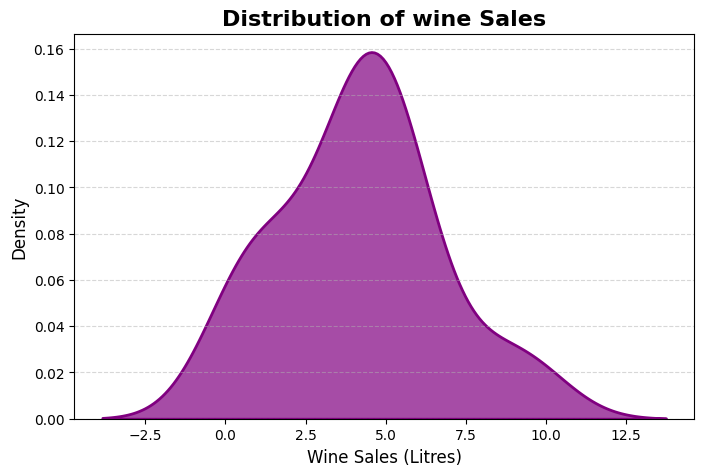

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(cao['wine'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of wine Sales', fontsize=16, fontweight='bold')
plt.xlabel('Wine Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [126]:
fig = px.line(cao,
              x = 'year',
              y= 'wine',
              title = 'General annual wine intake in Saint Petersburg',
              labels = {'wine': 'Wine Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

In [127]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(cao,
              x='year',
              y=['wine', 'beer', 'vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [128]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(cao,
              x='year',
              y=['wine','vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [129]:
cao_mean = cao[['beer','wine', 'champagne', 'brandy', 'vodka']].mean()
cao_mean

,0
beer,15.416316
wine,4.175263
champagne,2.057895
brandy,0.935789
vodka,12.712632


In [130]:
import plotly.express as px

# Sort data from largest to smallest
cao_mean_sorted = cao_mean.sort_values(ascending=False)

# Enhanced Bar Graph with Styling
fig = px.bar(
    cao_mean_sorted,
    x=cao_mean_sorted.values,
    y=cao_mean_sorted.index,
    orientation='h',
    title='Mean Distribution of Drinks (Largest to Smallest)',
    text=cao_mean_sorted.values,
    labels={'y': 'Drink Type', 'x': 'Mean Consumption (Litres)'},
    color=cao_mean_sorted.index,  # Different colors for each bar
    color_continuous_scale='viridis'  # Appealing color gradient
)

# Customizing layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format text values
    textposition='outside'       # Values appear outside for clarity
)

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=False),
    template='plotly_dark',
    height=500
)

fig.show()


### Republic of Karelia

In [140]:
rk = data[data['region']=='Republic of Karelia']
rk

,year,region,wine,beer,vodka,champagne,brandy,npg,birth_rate,death_rate,gdw,urbanization
24,1998,Republic of Karelia,3.20,16.20,15.40,0.50,0.2,-5.3,8.5,13.8,69.14,73.81
105,1999,Republic of Karelia,2.40,21.00,15.00,0.30,0.1,-7.5,8.2,15.7,66.76,74.03
186,2000,Republic of Karelia,2.80,24.90,17.20,0.40,0.2,-7.8,8.7,16.5,64.19,74.26
268,2001,Republic of Karelia,5.10,28.00,15.90,0.40,0.2,-8.0,9.4,17.4,61.83,74.47
350,2002,Republic of Karelia,9.30,33.60,12.40,0.40,0.2,-8.6,10.1,18.7,60.49,74.81
432,2003,Republic of Karelia,13.50,31.10,14.20,0.60,0.2,-9.7,10.2,19.9,58.43,75.14
514,2004,Republic of Karelia,16.90,33.20,14.00,0.70,0.5,-8.1,10.4,18.8,56.51,75.50
595,2005,Republic of Karelia,15.00,36.20,14.90,0.70,0.5,-8.2,9.9,18.5,55.94,75.90
676,2006,Republic of Karelia,14.70,40.90,15.00,0.80,0.5,-6.8,10.0,17.5,55.66,76.20
757,2007,Republic of Karelia,11.90,45.70,15.90,1.20,0.6,-5.3,10.6,16.6,56.09,76.60


In [141]:
fig = px.histogram(rk, x='wine', title='Distribution of wine sales in Saint Petersburg')
fig.show()

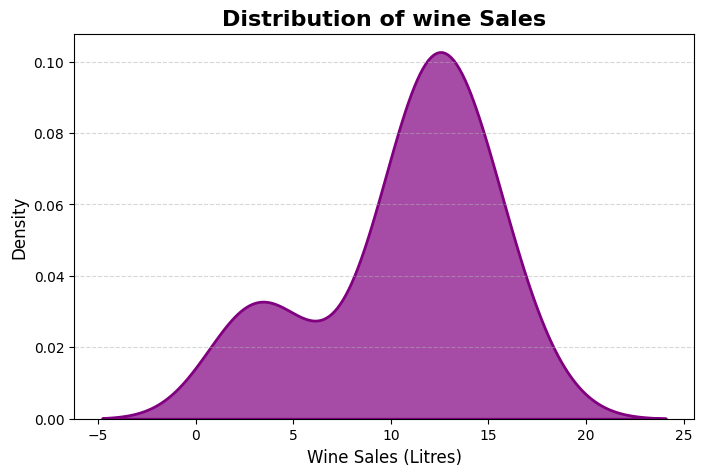

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

# Improved KDE plot
plt.figure(figsize=(8, 5))  # Adjust the figure size
sns.kdeplot(rk['wine'],
            fill=True,         # Adds color fill under the curve
            color='purple',    # Choose a standout color
            linewidth=2,       # Thicker line for better visibility
            alpha=0.7)         # Adjust transparency for balance

# Add title and labels
plt.title('Distribution of wine Sales', fontsize=16, fontweight='bold')
plt.xlabel('Wine Sales (Litres)', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Adding grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()


In [143]:
fig = px.line(rk,
              x = 'year',
              y= 'wine',
              title = 'General annual wine intake in Saint Petersburg',
              labels = {'wine': 'Wine Sales (Litres)', 'year': 'Year'},
              markers = True)

#Customization
fig.update_layout(
    title_font_size = 18,
    title_x = 0.5,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    template = 'plotly_dark'
)

fig.show()

In [144]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(rk,
              x='year',
              y=['wine', 'beer', 'vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [145]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(rk,
              x='year',
              y=['wine','vodka', 'brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [146]:
import plotly.express as px

# Improved Line Plot with Multiple Columns
fig = px.line(rk,
              x='year',
              y=['brandy', 'champagne'],
              title='General Alcohol Sales Trend in Saint Petersburg',
              labels={'value': 'Sales (Litres)', 'year': 'Year', 'variable': 'Alcohol Type'},
              markers=True  # Adds markers for better data visibility
             )

# Customizing layout for better appearance
fig.update_layout(
    title_font_size=18,        # Larger, bold title
    title_x=0.5,               # Center the title
    xaxis=dict(showgrid=False), # Remove gridlines for a cleaner look
    yaxis=dict(showgrid=True, gridcolor='lightgrey'),
    legend_title='Alcohol Type', # Improve legend clarity
    template='plotly_dark'      # Dark theme for better contrast
)

fig.show()

In [147]:
rk_mean = rk[['beer','wine', 'champagne', 'brandy', 'vodka']].mean()
rk_mean

,0
beer,42.354737
wine,10.762105
champagne,1.061579
brandy,0.736842
vodka,15.354211


In [148]:
import plotly.express as px

# Sort data from largest to smallest
rk_mean_sorted = rk_mean.sort_values(ascending=False)

# Enhanced Bar Graph with Styling
fig = px.bar(
    rk_mean_sorted,
    x=rk_mean_sorted.values,
    y=rk_mean_sorted.index,
    orientation='h',
    title='Mean Distribution of Drinks (Largest to Smallest)',
    text=rk_mean_sorted.values,
    labels={'y': 'Drink Type', 'x': 'Mean Consumption (Litres)'},
    color=rk_mean_sorted.index,  # Different colors for each bar
    color_continuous_scale='viridis'  # Appealing color gradient
)

# Customizing layout
fig.update_traces(
    texttemplate='%{text:.2f}',  # Format text values
    textposition='outside'       # Values appear outside for clarity
)

fig.update_layout(
    title_font_size=18,
    title_x=0.5,
    xaxis=dict(showgrid=True, gridcolor='lightgrey'),
    yaxis=dict(showgrid=False),
    template='plotly_dark',
    height=500
)

fig.show()
